## Preprocesamiento de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Descarga del dataset

In [2]:
!git clone https://github.com/ajulissa/CovidPredict.git

Cloning into 'CovidPredict'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 69 (delta 28), reused 42 (delta 12), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [3]:
%cd CovidPredict

/content/CovidPredict


In [4]:
!unzip covidTested_v0083.zip

Archive:  covidTested_v0083.zip
  inflating: covidTested_v0083.csv   


In [5]:
!ls

Covid.ipynb	       covidTested_v0083.zip  model.pkl  static
covidTested_v0083.csv  main.py		      README.md  templates


Lectura del dataset (.csv)

In [6]:
df0083 = pd.read_csv('./covidTested_v0083.csv')
df0083

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


Exploración de datos

In [8]:
df0083['resultado'].value_counts()

negative    2480403
positive     220975
other         41218
Name: resultado, dtype: int64

In [9]:
df0083['sesenta_mas'].value_counts()

No     1908553
Yes     286399
Name: sesenta_mas, dtype: int64

In [10]:
df0083.isnull().sum() 

fecha                            0
tos                              0
fiebre                           0
dolor_de_garganta                0
dificultad_para_respirar         0
dolor_de_cabeza                  0
resultado                        0
sesenta_mas                 547644
sexo                         92886
indicaciones                     0
dtype: int64

Eliminación de datos nulos

In [11]:
data = df0083.dropna()
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [12]:
data['resultado'].value_counts()

negative    1943172
positive     208726
other         34329
Name: resultado, dtype: int64

Eliminación de datos irrelevantes

In [13]:
data = data.drop(data[data["resultado"].str.contains("other")].index)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [14]:
data['resultado'].value_counts()

negative    1943172
positive     208726
Name: resultado, dtype: int64

In [15]:
data['indicaciones'].value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: indicaciones, dtype: int64

Normalización los datos textuales

*En el caso de la columna indicaciones:*

*Other -> 0*

*Abroad -> 0.8*

*Contact with confirmed -> 1*

In [16]:
data.resultado.replace({"positive": 1, "negative": 0}, inplace = True) #cambio para resultados
data.sesenta_mas.replace({"Yes": 1, "No": 0}, inplace = True) #edad
data.sexo.replace({"male": 1, "female": 0}, inplace = True) #sexo
data.indicaciones.replace({"Contact with confirmed": 1, "Abroad": 0.8, "Other": 0}, inplace = True)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,0,0,1,0.0
1,2020-11-12,0,1,0,0,0,0,0,1,0.0
2,2020-11-12,0,0,0,0,0,0,1,0,0.0
3,2020-11-12,0,0,0,0,0,0,0,1,0.0
4,2020-11-12,0,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,1,0,0,1.0
2731640,2020-03-20,0,0,0,0,0,0,0,0,0.0
2731643,2020-03-20,1,0,0,0,0,0,0,1,1.0
2731644,2020-03-20,0,0,0,0,0,0,0,0,0.0


Datos de entranamiento y validación

In [176]:
from sklearn.model_selection import train_test_split

X = data.drop(["resultado", "fecha"], axis = 1)
y = data.resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Sobremuestreo de datos de entrenamiento (en este caso para los resultados positivos)

In [177]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler()
X_train, y_train = over_sampler.fit_resample(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Clase LogisticRegression para el entrenamiento y predicción

In [146]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.005, gamma=0.9, n_iters=500):
        self.lr = learning_rate
        self.gamma = gamma
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.e_h = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        v_w = np.zeros(n_features)
        v_b = 0
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = np.dot(X.T, (y_predicted - y))
            db = np.sum(y_predicted - y)
            
            # momentum
            v_w = self.gamma * v_w + self.lr * dw 
            v_b = self.gamma * v_b + self.lr * db
            
            # update parameters
            self.weights -= v_w
            self.bias -= v_b
            self.e_h.append(self.error(X, y))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def error(self, X, y):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        err = 0.5 * sum((y_predicted - y) ** 2)
        return err

### Función para obtener la precisión

In [147]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

## Entrenamiento

In [212]:
regressor = LogisticRegression(learning_rate=0.01, gamma=0.9, n_iters=20)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


## Validación

In [213]:
predictions = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


## Resultados

### Precisión

In [214]:
print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9196059296435708


### Parámetros: Pesos y Bias

In [191]:
print("Pesos:", regressor.weights)
print("Bias:", regressor.bias)

Pesos: [ 5528.1677893  17731.44059914 15496.18549159  6855.36012085
 22865.85922752 -4260.08208755  2306.97950872 24981.16325573]
Bias: -7313.372917662111


### Matriz de confusión

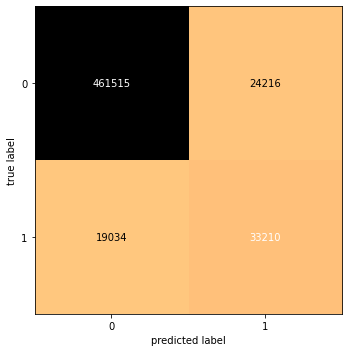

In [188]:
matriz = confusion_matrix(y_test, predictions)

plot_confusion_matrix(conf_mat=matriz, figsize=(5,5), show_normed=False, cmap='copper_r')
plt.tight_layout()

### Error por iteración

In [180]:
print(regressor.e_h)

[488259.625, 698485.5, 336656.49928141275, 728720.5, 535727.0, 306076.5, 309618.5, 297438.0, 486606.0, 486280.5, 297124.5, 304148.9999945621, 299023.5, 351376.0, 728720.5, 535727.0, 308309.5, 327310.7664801087, 312556.85602216073, 300034.5, 694279.5, 486723.5, 315173.0, 511172.0, 304793.0]


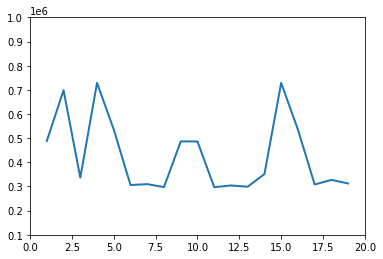

In [190]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(100000, 1000000))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(1, 20, num=20)
    y = regressor.e_h
    line.set_data(x[:int(i/10)], y[:int(i/10)])
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
#rc('animation', html='jshtml')
anim

## Exportación del modelo

In [192]:
import pickle

# guardamos el modelo para ser usado en la aplicación
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

## Importación del modelo

In [193]:
model = pickle.load(open('model.pkl', 'rb'))

Comparación del modelo importado y la validación

In [245]:
y_predict = model.predict(X_test)
print(y_predict[0:50])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in exp


[0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [246]:
predictions[0:50]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

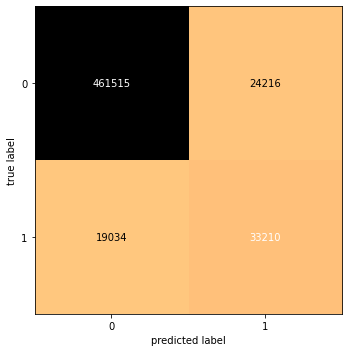

In [247]:
matriz_prueba = confusion_matrix(y_test, y_predict)

plot_confusion_matrix(conf_mat=matriz_prueba, figsize=(5,5), show_normed=False, cmap='copper_r')
plt.tight_layout()